## Transfer Learning Resenet50

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './Dataset1/train'
valid_path = './Dataset1/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




94765736/94765736 [==============================] - 70s 1us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('./Dataset1/train/*')
folders

['./Dataset1/train\\healthycows', './Dataset1/train\\lumpycows']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
xx=model.summary()
xx

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 936 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('./Dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical',shuffle=False)

Found 221 images belonging to 2 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
94/94 [==============================] - 93s 960ms/step - loss: 0.9849 - accuracy: 0.5855 - val_loss: 0.7737 - val_accuracy: 0.5475
Epoch 2/15
94/94 [==============================] - 82s 868ms/step - loss: 0.8012 - accuracy: 0.6496 - val_loss: 0.7153 - val_accuracy: 0.6290
Epoch 3/15
94/94 [==============================] - 75s 799ms/step - loss: 0.8271 - accuracy: 0.6645 - val_loss: 0.6803 - val_accuracy: 0.6742
Epoch 4/15
94/94 [==============================] - 77s 823ms/step - loss: 0.6244 - accuracy: 0.6880 - val_loss: 0.9456 - val_accuracy: 0.5475
Epoch 5/15
94/94 [==============================] - 81s 861ms/step - loss: 0.6349 - accuracy: 0.6955 - val_loss: 0.5583 - val_accuracy: 0.7240
Epoch 6/15
94/94 [==============================] - 79s 836ms/step - loss: 0.8363 - accuracy: 0.6667 - val_loss: 0.4863 - val_accuracy: 0.7602
Epoch 7/15
94/94 [==============================] - 116s 1s/step - loss: 0.7676 - accuracy: 0.6902 - val_loss: 0.9339 - val_accuracy: 0.6380
E

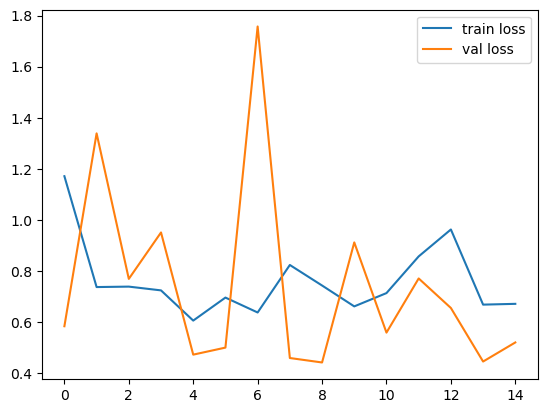

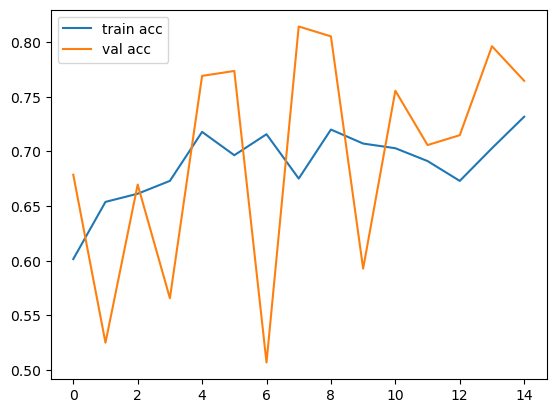

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('lumpyresnet50.h5')

c:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# New Section

In [ ]:

y_pred = model.predict(test_set)


23/23 [==============================] - 17s 677ms/step


In [ ]:
y_pred

array([[4.2741811e-01, 5.7258195e-01],
       [2.9007864e-01, 7.0992136e-01],
       [9.9962282e-01, 3.7713317e-04],
       [6.4698286e-02, 9.3530172e-01],
       [9.9995983e-01, 4.0116145e-05],
       [9.9996567e-01, 3.4286859e-05],
       [9.9932384e-01, 6.7618530e-04],
       [9.9999952e-01, 4.9588186e-07],
       [9.9966943e-01, 3.3057478e-04],
       [8.0474734e-01, 1.9525266e-01],
       [9.9991333e-01, 8.6614542e-05],
       [9.9894661e-01, 1.0534625e-03],
       [9.9984443e-01, 1.5555786e-04],
       [9.4734633e-01, 5.2653681e-02],
       [1.0000000e+00, 8.4107893e-10],
       [9.9999440e-01, 5.5749088e-06],
       [2.7193591e-02, 9.7280639e-01],
       [5.8195543e-01, 4.1804463e-01],
       [3.5674644e-01, 6.4325356e-01],
       [2.3130281e-04, 9.9976867e-01],
       [9.9785453e-01, 2.1454357e-03],
       [9.8675561e-01, 1.3244404e-02],
       [5.0277455e-04, 9.9949718e-01],
       [9.9750215e-01, 2.4978537e-03],
       [9.9999976e-01, 1.8646860e-07],
       [9.8688644e-01, 1.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_true=test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[85, 24],
       [28, 84]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       109
           1       0.78      0.75      0.76       112

    accuracy                           0.76       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.77      0.76      0.76       221



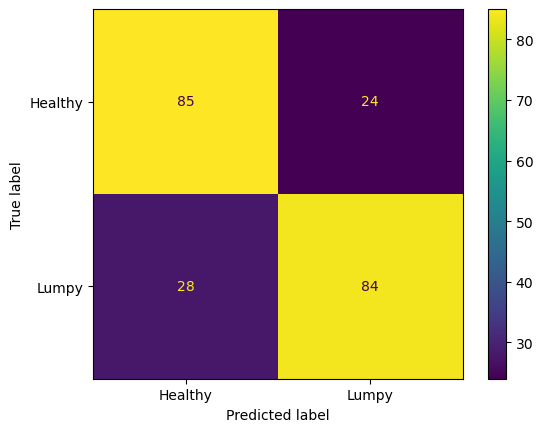

In [ ]:

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy','Lumpy'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()